In [6]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
np.set_printoptions(suppress=True)

dataset_prepared = np.load('dataset_train_prepared.npy')

dataset_X = dataset_prepared[:, :273]
dataset_y = dataset_prepared[:, 273:274].ravel()

seed = 52

X_train, X_test, y_train, y_test = train_test_split(dataset_X, dataset_y, test_size=0.1, random_state=seed)

(145144, 274)


In [7]:
rf_model = pickle.load(open('models/rf_model.pkl', 'rb'))
cb_model = pickle.load(open('models/cb_model.pkl', 'rb'))

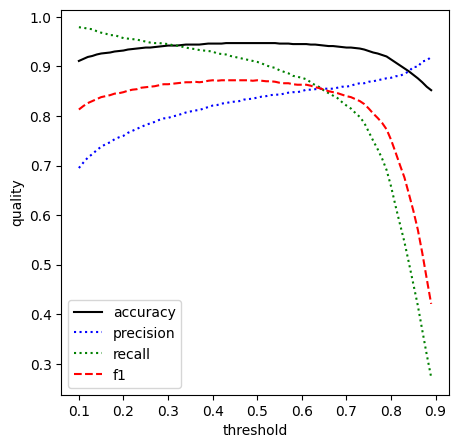

In [8]:
rf_y_pred_proba = np.delete(rf_model.predict_proba(X_test), [0], axis=1)

thresholds = np.arange(0.1, 0.9, 0.01)


def func_accuracy(t):
    pred = np.array(list(map(lambda x: int(x >= t), rf_y_pred_proba)))
    return round(accuracy_score(y_test, pred), 3)

accuracy = np.array(list(map(func_accuracy, thresholds)))

def func_precision(t):
    pred = np.array(list(map(lambda x: int(x >= t), rf_y_pred_proba)))
    return round(precision_score(y_test, pred), 3)

precision = np.array(list(map(func_precision, thresholds)))

def func_recall(t):
    pred = np.array(list(map(lambda x: int(x >= t), rf_y_pred_proba)))
    return round(recall_score(y_test, pred), 3)

recall = np.array(list(map(func_recall, thresholds)))

def func_f1(t):
    pred = np.array(list(map(lambda x: int(x >= t), rf_y_pred_proba)))
    return round(f1_score(y_test, pred), 3)

f1 = np.array(list(map(func_f1, thresholds)))


plt.figure(figsize=(5,5))
plt.plot(thresholds, accuracy, 'k', label='accuracy')
plt.plot(thresholds, precision, ':b', label='precision')
plt.plot(thresholds, recall, ':g', label='recall')
plt.plot(thresholds, f1, '--r', label='f1')
plt.xlabel('threshold')
plt.ylabel('quality')
plt.legend()
plt.show()

accuracy: 0.947
precision: 0.837
recall: 0.909
f1: 0.872


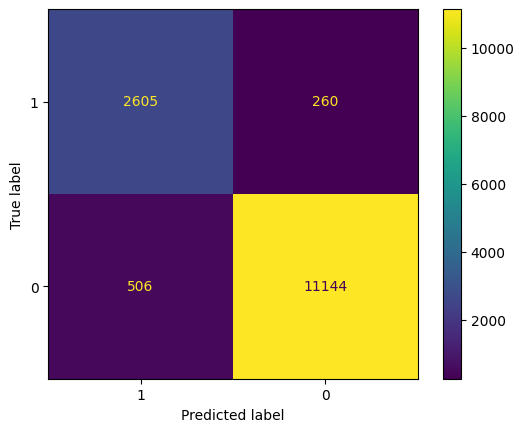

In [9]:
rf_y_pred = rf_model.predict(X_test)

print('accuracy:', round(accuracy_score(y_test, rf_y_pred), 3))
print('precision:', round(precision_score(y_test, rf_y_pred), 3))
print('recall:', round(recall_score(y_test, rf_y_pred), 3))
print('f1:', round(f1_score(y_test, rf_y_pred), 3))

cm = confusion_matrix(y_test, rf_y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 0])
disp.plot()
plt.show()

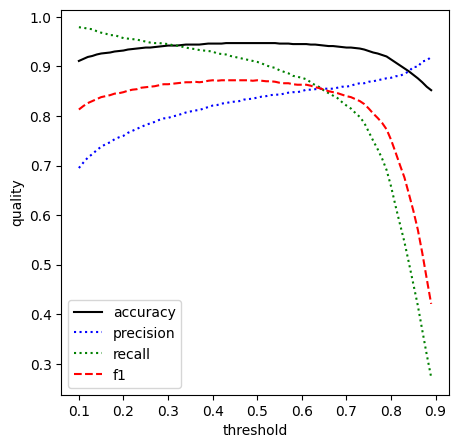

In [10]:
cb_y_pred_proba = np.delete(cb_model.predict_proba(X_test), [0], axis=1)

thresholds = np.arange(0.1, 0.9, 0.01)

accuracy = np.array(list(map(func_accuracy, thresholds)))
precision = np.array(list(map(func_precision, thresholds)))
recall = np.array(list(map(func_recall, thresholds)))
f1 = np.array(list(map(func_f1, thresholds)))


plt.figure(figsize=(5,5))
plt.plot(thresholds, accuracy, 'k', label='accuracy')
plt.plot(thresholds, precision, ':b', label='precision')
plt.plot(thresholds, recall, ':g', label='recall')
plt.plot(thresholds, f1, '--r', label='f1')
plt.xlabel('threshold')
plt.ylabel('quality')
plt.legend()
plt.show()

accuracy: 0.947
precision: 0.839
recall: 0.908
f1: 0.872


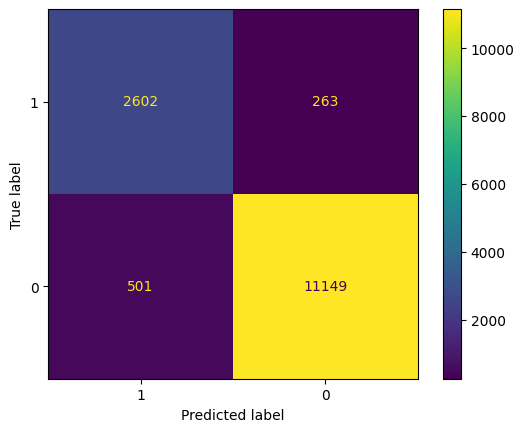

In [11]:
cb_y_pred = cb_model.predict(X_test)

print('accuracy:', round(accuracy_score(y_test, cb_y_pred), 3))
print('precision:', round(precision_score(y_test, cb_y_pred), 3))
print('recall:', round(recall_score(y_test, cb_y_pred), 3))
print('f1:', round(f1_score(y_test, cb_y_pred), 3))

cm = confusion_matrix(y_test, cb_y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 0])
disp.plot()
plt.show()

accuracy: 0.947
precision: 0.84
recall: 0.906
f1: 0.872


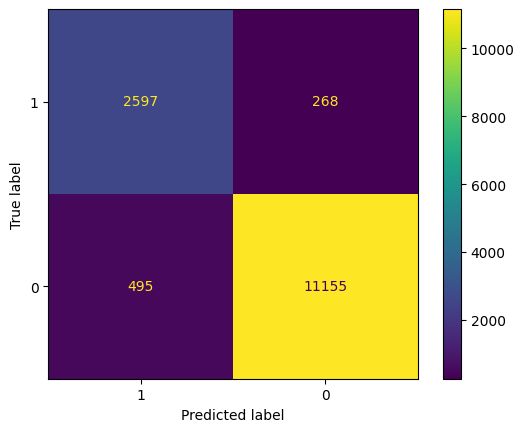

In [13]:
y_pred_proba = (2*rf_y_pred_proba * cb_y_pred_proba)/(rf_y_pred_proba+cb_y_pred_proba)
y_pred = np.array(list(map(lambda x: int(x >= 0.5), y_pred_proba)))

print('accuracy:', round(accuracy_score(y_test, y_pred), 3))
print('precision:', round(precision_score(y_test, y_pred), 3))
print('recall:', round(recall_score(y_test, y_pred), 3))
print('f1:', round(f1_score(y_test, y_pred), 3))

cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 0])
disp.plot()
plt.show()